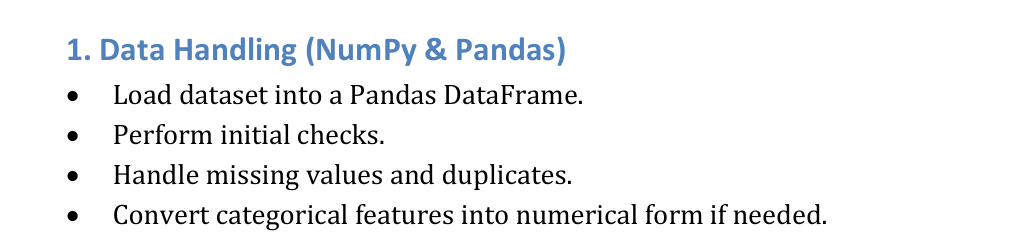

In [493]:
import pandas as pd

In [494]:
df=pd.read_csv("heart disease classification dataset (2).csv")


In [495]:
df.shape

(303, 15)

In [496]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [497]:
df['Unnamed: 0'].values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [498]:
len(df['Unnamed: 0'].values)

303

The column 'Unnamed: 0' seem to be like that one of index, so I am going to removed it.

In [499]:
df.head(2)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes


In [500]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [502]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [503]:
df.fillna??

Signature:
df.fillna(
    value: 'Hashable | Mapping | Series | DataFrame | None' = None,
    *,
    method: 'FillnaOptions | None' = None,
    axis: 'Axis | None' = None,
    inplace: 'bool_t' = False,
    limit: 'int | None' = None,
    downcast: 'dict | None | lib.NoDefault' = <no_default>,
) -> 'Self | None'
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series:

    * ffill: propagate last valid observation forward to next valid.
    * backfill / bfill: use next valid observation to fill gap.

    .. deprecated:: 2.1.0
  

In [504]:
df.isnull().sum()/df.shape[0]


age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.013201
chol        0.003300
fbs         0.000000
restecg     0.000000
thalach     0.016502
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
target      0.000000
dtype: float64

In [505]:
df.isnull().sum()
print(f'Columns with missing values:\n {df.isnull().sum()[df.isnull().sum()>0]}')

Columns with missing values:
 trestbps    4
chol        1
thalach     5
dtype: int64


In [506]:
# df.dropna(inplace=True)
df_trestbps_mean=df['trestbps'].mean()
df_col_mean=df['chol'].mean()
df_thalach_mean=df['thalach'].mean()

In [507]:
df['trestbps'].fillna(value=df_trestbps_mean,inplace=True)
df['chol'].fillna(value=df_col_mean,inplace=True)
df['thalach'].fillna(value=df_thalach_mean,inplace=True)



In [508]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [509]:
df.duplicated??

Signature:
df.duplicated(
    subset: 'Hashable | Sequence[Hashable] | None' = None,
    keep: 'DropKeep' = 'first',
) -> 'Series'
Source:   
    def duplicated(
        self,
        subset: Hashable | Sequence[Hashable] | None = None,
        keep: DropKeep = "first",
    ) -> Series:
        """
        Return boolean Series denoting duplicate rows.

        Considering certain columns is optional.

        Parameters
        ----------
        subset : column label or sequence of labels, optional
            Only consider certain columns for identifying duplicates, by
            default use all of the columns.
        keep : {'first', 'last', False}, default 'first'
            Determines which duplicates (if any) to mark.

            - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
            - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
            - False : Mark all duplicates as ``True``.

        Returns
        -------
 

In [511]:
df[df.duplicated(keep=False).values]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,male,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,yes
164,38,male,2,138.0,175.0,0,1,173.0,0,0.0,2,4,2,yes


In [512]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [513]:
# Feature: sex ( has no order so one hot encoding will be applied)


In [514]:
df['sex'].value_counts()

sex
male      206
female     96
Name: count, dtype: int64

In [515]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
ColumnTransformer??

Init signature:
ColumnTransformer(
    transformers,
    *,
    remainder='drop',
    sparse_threshold=0.3,
    n_jobs=None,
    transformer_weights=None,
    verbose=False,
    verbose_feature_names_out=True,
)
Source:        
class ColumnTransformer(TransformerMixin, _BaseComposition):
    """Applies transformers to columns of an array or pandas DataFrame.

    This estimator allows different columns or column subsets of the input
    to be transformed separately and the features generated by each transformer
    will be concatenated to form a single feature space.
    This is useful for heterogeneous or columnar data, to combine several
    feature extraction mechanisms or transformations into a single transformer.

    Read more in the :ref:`User Guide <column_transformer>`.

    .. versionadded:: 0.20

    Parameters
    ----------
    transformers : list of tuples
        List of (name, transformer, columns) tuples specifying the
        transformer objects to be applied to subse

In [516]:
ohe=OneHotEncoder(drop='first')
trf1=ColumnTransformer(
    [('One Hot Encode',ohe,['sex'])],
    remainder='passthrough'
)


In [517]:
#Encoding to be done after the train test split

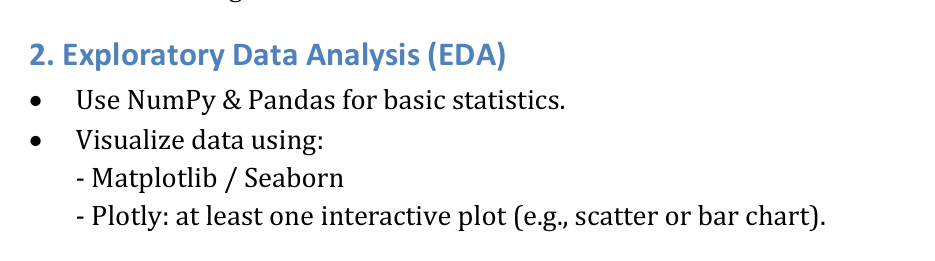

In [518]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [396]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.963576,131.691555,246.554033,0.149007,0.526490,149.789168,0.327815,1.043046,1.397351,0.718543,2.314570
std,9.04797,1.032044,17.537203,51.744722,0.356686,0.526027,22.373429,0.470196,1.161452,0.616274,1.006748,0.613026
min,29.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.50000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.00000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


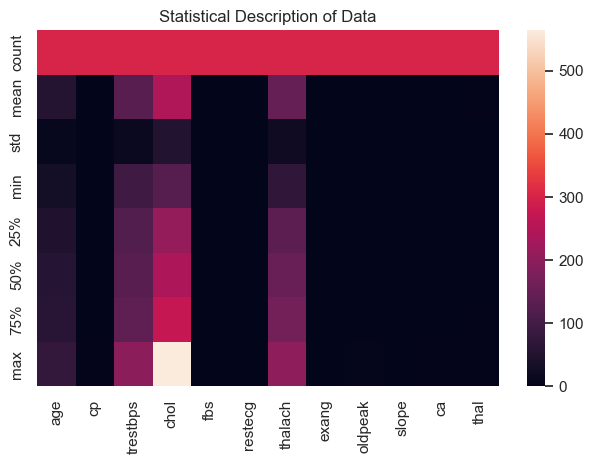

In [530]:
import seaborn as sns
sns.heatmap(df.describe())
plt.title('Statistical Description of Data')
plt.tight_layout()
plt.savefig('statfig.png')
plt.show()

## Class Imbalance:

In [522]:
df['target'].value_counts()

target
yes    164
no     138
Name: count, dtype: int64

In [523]:
df['target'].value_counts().index,df['target'].value_counts().values

(Index(['yes', 'no'], dtype='object', name='target'),
 array([164, 138], dtype=int64))

In [524]:
import matplotlib.pyplot as plt
plt.pie??

Signature:
plt.pie(
    x: 'ArrayLike',
    explode: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    colors: 'ColorType | Sequence[ColorType] | None' = None,
    autopct: 'str | Callable[[float], str] | None' = None,
    pctdistance: 'float' = 0.6,
    shadow: 'bool' = False,
    labeldistance: 'float | None' = 1.1,
    startangle: 'float' = 0,
    radius: 'float' = 1,
    counterclock: 'bool' = True,
    wedgeprops: 'dict[str, Any] | None' = None,
    textprops: 'dict[str, Any] | None' = None,
    center: 'tuple[float, float]' = (0, 0),
    frame: 'bool' = False,
    rotatelabels: 'bool' = False,
    *,
    normalize: 'bool' = True,
    hatch: 'str | Sequence[str] | None' = None,
    data=None,
) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.

The wedges are plotted counterclockwise, by default starting fr

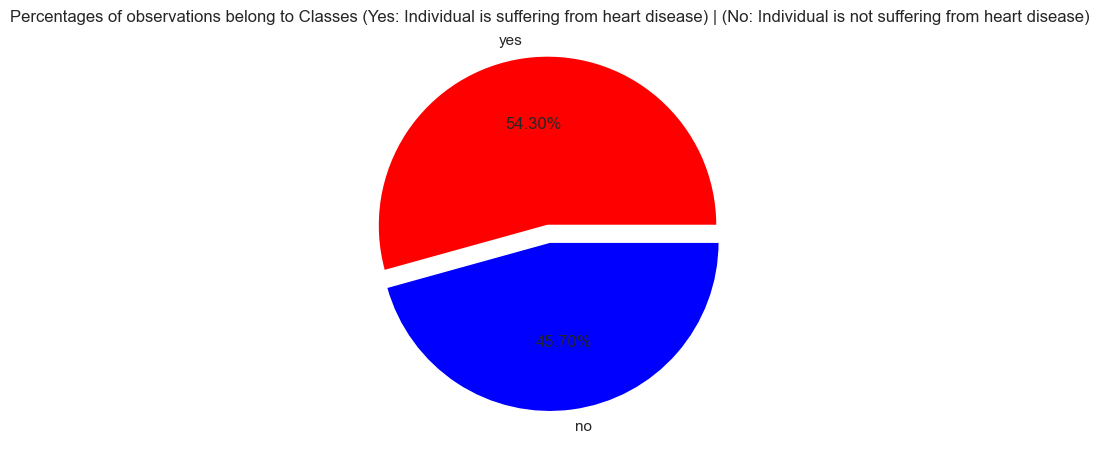

In [525]:
plt.pie(x=df['target'].value_counts().values, labels=df['target'].value_counts().index,explode=[.1,0],colors=['red','blue'],autopct='%0.2f%%')
plt.title('Percentages of observations belong to Classes (Yes: Individual is suffering from heart disease) | (No: Individual is not suffering from heart disease)')
plt.savefig('piedist.png')
plt.tight_layout()
plt.show()

So, in our data there are 54.30% patients who are suffering from heart disease while 45.70% of the patients are not suffering from the heart disease.

In [526]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


## Gender Distribution for the Patients suffering from heart disease

In [527]:
df_yes=df[df['target']=='yes']
print(df_yes['sex'].value_counts())
print(df_yes.shape[0])

sex
male      92
female    72
Name: count, dtype: int64
164


Among the people 164 suffering from heart disease, 92 are male, 72 are female

## Average Serum Cholestrol of Patients suffering/ not suffering from heart disease

In [528]:
df.groupby('target')['chol'].mean()

target
no     251.205202
yes    242.640244
Name: chol, dtype: float64

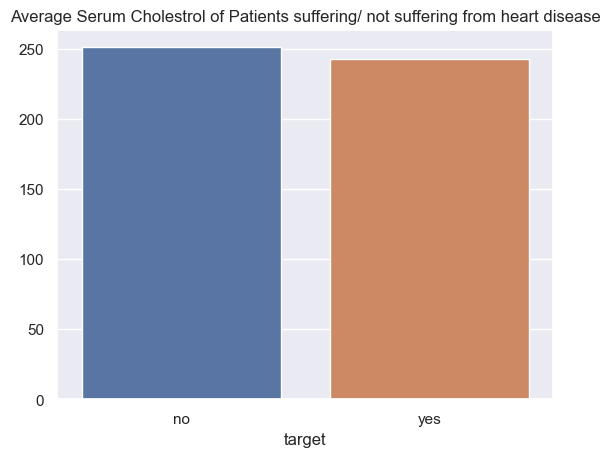

In [529]:
sns.barplot(x=df.groupby('target')['chol'].mean().index,y=df.groupby('target')['chol'].mean().values)
plt.title('Average Serum Cholestrol of Patients suffering/ not suffering from heart disease')
plt.savefig('avg_cholestrol.png')
plt.show()

## Mean of Serum Cholestrol of Patients having heart disease: 242.640244
## Mean of Serum Cholestrol of Patients not having heart disease: 251.205202

## Age Range for patient suffering from heart disease

In [412]:
Age_yes=df_yes['age'].values
import numpy as np

In [413]:
print(f'Minimum Age of a patient suffering from heart disease: {np.min(Age_yes)} years')
print(f'Maximum Age of a patient suffering from heart disease: {np.max(Age_yes)} years')
print(f'Average Age of a patient suffering from heart disease: {np.mean(Age_yes)} years')

Minimum Age of a patient suffering from heart disease: 29 years
Maximum Age of a patient suffering from heart disease: 76 years
Average Age of a patient suffering from heart disease: 52.58536585365854 years


In [492]:
sns.histplot(df['age'],hue=df['target'])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

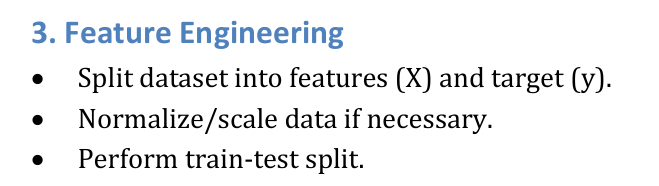

In [414]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


In [415]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [416]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [417]:
X_train
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot Encode', OneHotEncoder(drop='first'),
                                 ['sex'])])

In [418]:
trf1.fit(X_train)
X_train_trf=trf1.transform(X_train)
X_test_trf=trf1.transform(X_test)

In [419]:
# y_train

In [420]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [421]:
X_train_trf.shape

(241, 13)

In [422]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train_trf)
X_test_scaled=sc.transform(X_test_trf)

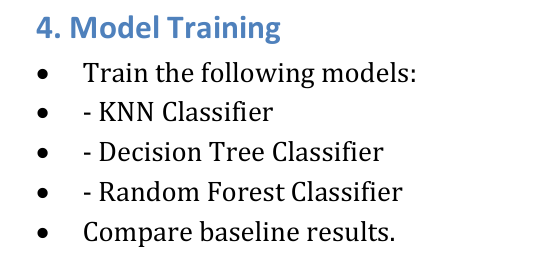

In [423]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [424]:
models_dict={
    'KNN Classifier':KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42)
}

In [425]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score

In [426]:
List_accuracy=[]
List_precision=[]
List_recall=[]
List_f1=[]
List_fbeta=[]
List_name=[]
for model_name,constr in models_dict.items():
    classifier=constr
    List_name.append(model_name)
    classifier.fit(X_train_scaled,y_train)
    List_accuracy.append(accuracy_score(y_test,classifier.predict(X_test_scaled)))
    List_precision.append(precision_score(y_test,classifier.predict(X_test_scaled),average='weighted'))
    List_recall.append(recall_score(y_test,classifier.predict(X_test_scaled),average='weighted'))
    List_f1.append(f1_score(y_test,classifier.predict(X_test_scaled),average='weighted'))
    

In [429]:
Results=pd.DataFrame({
    'Model': List_name,
    'Accuracy':List_accuracy,
    'Precision':List_precision,
    'Recall':List_recall,
    'F1 Score':List_f1
})
Results.sort_values('Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN Classifier,0.918033,0.922484,0.918033,0.918033
2,Random Forest Classifier,0.868852,0.870862,0.868852,0.868923
1,Decision Tree Classifier,0.770492,0.776666,0.770492,0.770245


In [431]:
#Check Overfitting
for model_name,constr in models_dict.items():
    classifier=constr
    classifier.fit(X_train_scaled,y_train)
    print(f'{model_name} Training Acc: {accuracy_score(y_train,classifier.predict(X_train_scaled))}')
    print(f'{model_name} Testing Acc: {accuracy_score(y_test,classifier.predict(X_test_scaled))}')
    print('------------')

KNN Classifier Training Acc: 0.8630705394190872
KNN Classifier Testing Acc: 0.9180327868852459
------------
Decision Tree Classifier Training Acc: 1.0
Decision Tree Classifier Testing Acc: 0.7704918032786885
------------
Random Forest Classifier Training Acc: 1.0
Random Forest Classifier Testing Acc: 0.8688524590163934
------------


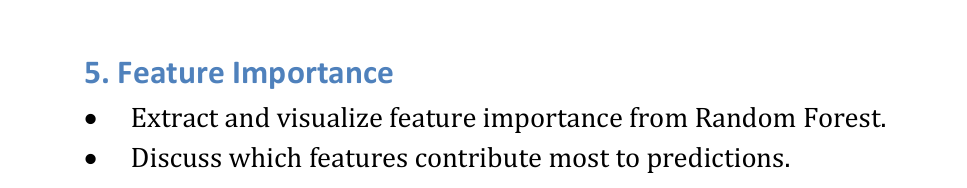

In [432]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

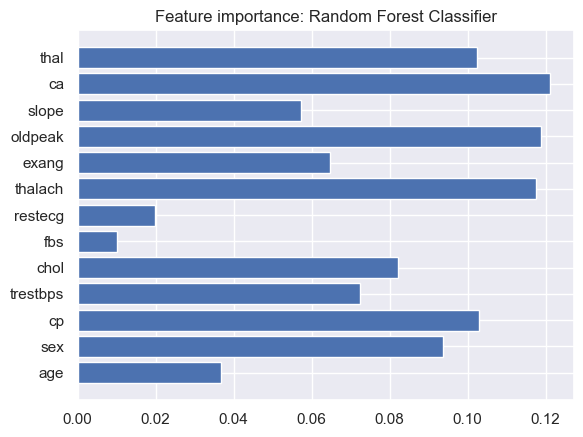

In [435]:
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled,y_train)
# clf
import seaborn as sns
sns.set_style('whitegrid')
sns.set_theme()
plt.barh(y=X.columns,width=clf.feature_importances_)
plt.title('Feature importance: Random Forest Classifier')
plt.show()

## Features such as "ca", 'oldpeak',"thalach" are the three most important features according to random forest classifier

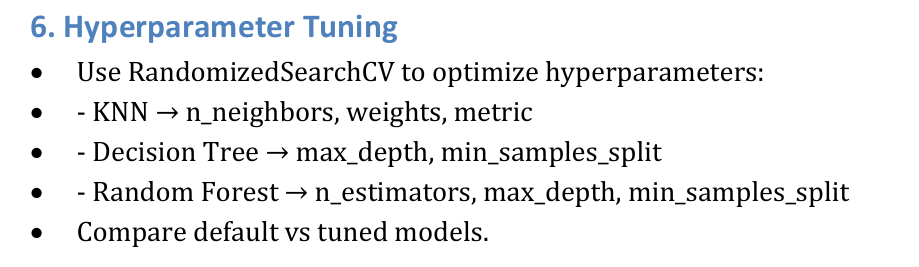

In [457]:
from sklearn.model_selection import RandomizedSearchCV
hyper={
    "n_neighbors":[3,5,7,9,11,13,15,17],
    #,11,13,15
    "weights":['uniform','distance'],
    "metric":['euclidean','manhattan','cosine','l1','l2']
}
RsCV_KNN=RandomizedSearchCV(estimator=KNeighborsClassifier(),param_distributions=hyper,scoring='accuracy',cv=10,random_state=42)


In [458]:
RsCV_KNN.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'cosine', 'l1', 'l2'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [459]:
RsCV_KNN.best_params_

{'weights': 'uniform', 'n_neighbors': 17, 'metric': 'manhattan'}

In [460]:
clf=KNeighborsClassifier(weights= 'uniform', n_neighbors= 17, metric= 'manhattan')
clf.fit(X_train_scaled,y_train)
print(f'Training Acc: {accuracy_score(y_train,clf.predict(X_train_scaled))}')
print(f'Testing Acc: {accuracy_score(y_test,clf.predict(X_test_scaled))}')

Training Acc: 0.8174273858921162
Testing Acc: 0.8688524590163934


In [464]:
from sklearn.model_selection import RandomizedSearchCV

hyper={
    "max_depth":[1,3,5,7,10,13,15,17,19,20,22,25],
    "min_samples_split":[4,8,12,16,20,24]
}
RsCV_DT=RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_distributions=hyper,scoring='accuracy',cv=5,random_state=42)


In [465]:
RsCV_DT.fit(X_train_scaled,y_train)
RsCV_DT.best_params_

{'min_samples_split': 20, 'max_depth': 10}

In [466]:
clf=DecisionTreeClassifier(random_state=42,min_samples_split=20, max_depth= 10)
clf.fit(X_train_scaled,y_train)
print(f'Training Acc: {accuracy_score(y_train,clf.predict(X_train_scaled))}')
print(f'Testing Acc: {accuracy_score(y_test,clf.predict(X_test_scaled))}')

Training Acc: 0.8547717842323651
Testing Acc: 0.8032786885245902


In [467]:
from sklearn.model_selection import RandomizedSearchCV
hyper={
    "n_estimators":[10,20,40,80,160],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "min_samples_split":[10,12,14,16,18,20]
}
#87,86 


RsCV_RF=RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),param_distributions=hyper,scoring='accuracy',cv=5,random_state=42)


In [468]:
RsCV_RF.fit(X_train_scaled,y_train)
RsCV_RF.best_params_

{'n_estimators': 40, 'min_samples_split': 20, 'max_depth': 15}

In [469]:
clf=RandomForestClassifier(random_state=42,min_samples_split=20, max_depth= 15,n_estimators=40)
clf.fit(X_train_scaled,y_train)
print(f'Training Acc: {accuracy_score(y_train,clf.predict(X_train_scaled))}')
print(f'Testing Acc: {accuracy_score(y_test,clf.predict(X_test_scaled))}')

Training Acc: 0.8796680497925311
Testing Acc: 0.8688524590163934


## Best Performance on test Data: KNN Classifier before fine tuning.

## KNN is the only algorithm that is giving the testing accuracy greater than the training accuracy in either for the cases: with or without fine tuning.